In [40]:
#Thư viện
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Đọc dữ liệu
df = pd.read_csv("insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# kiểm tra xem có giá trị null không
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# xóa dữ liệu trùng
df.drop_duplicates(inplace=True)

In [8]:
# thay đổi kiểu giữ liệu cột sex
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

In [9]:
# thay đổi kiểu giữ liệu cột smoker
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

In [10]:
# thay đổi kiểu giữ liệu cột region
df['region'] = df['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [11]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,2.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,2.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


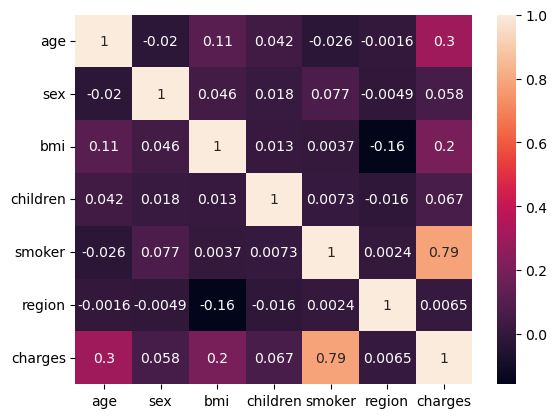

In [12]:
# biểu đồ heatmap
sns.heatmap(df.corr(), annot=True)

# hiển thị biểu đồ
plt.show()

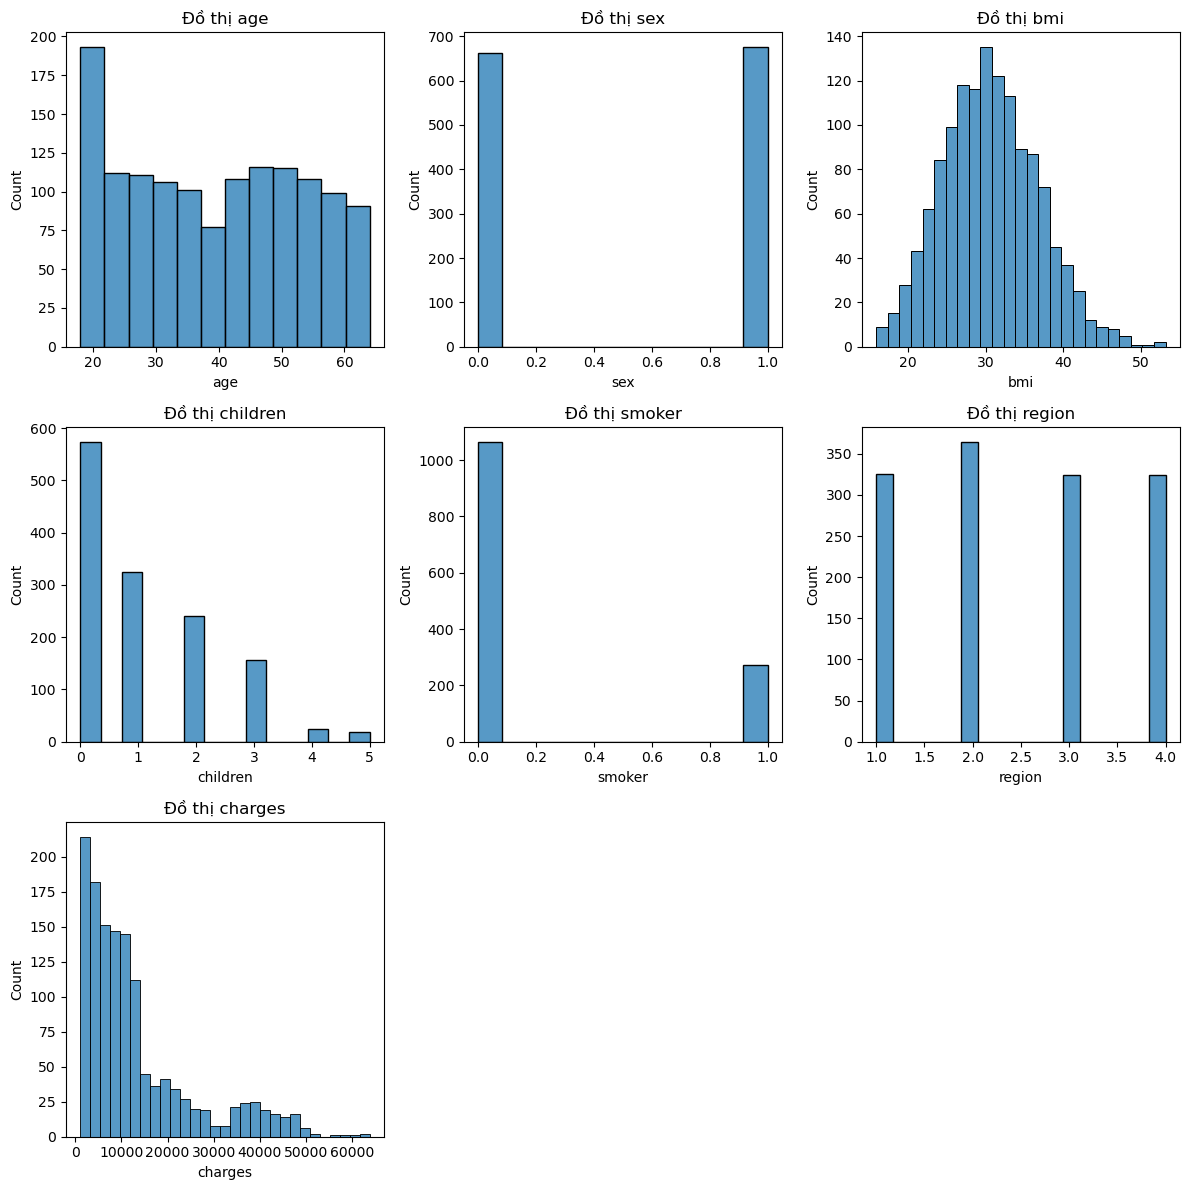

In [13]:
# Tính toán số lượng hàng và cột cho lưới đồ thị
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1

# Tạo lưới đồ thị
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows*4))

# Vẽ đồ thị cho từng cột
for i, column in enumerate(df.columns):
    ax = axes[i // 3, i % 3]  # Chọn trục (axes) tương ứng trong lưới
    sns.histplot(df[column], ax=ax)
    ax.set_title(f"Đồ thị {column}")

# Xoá các trục không sử dụng
if num_cols % 3 != 0:
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes[i // 3, i % 3])

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

In [27]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_lr = lr.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("R2 core: ", r2_score(y_test, y_pred_lr))

MSE:  36435712.71655713
R2 core:  0.73399749548324


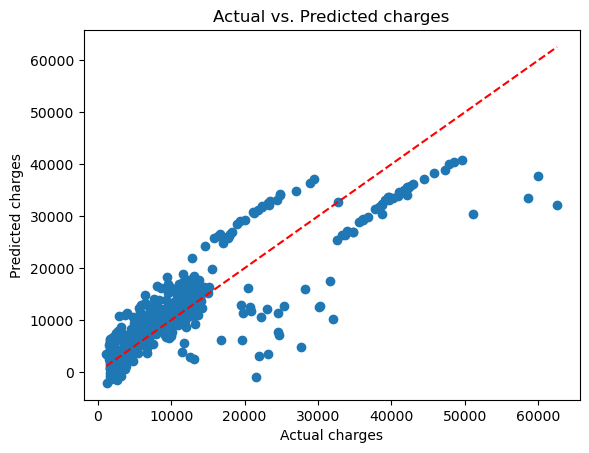

In [42]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual vs. Predicted charges')

# Vẽ đường đường chéo y = x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')

plt.show()
#Trục x trên biểu đồ đại diện cho giá trị thực tế và y là nó dự đoán

In [32]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred_rfr = rfr.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred_rfr))
print("R2 core: ", r2_score(y_test, y_pred_rfr))

MSE:  23988849.89691637
R2 core:  0.8248670417758378


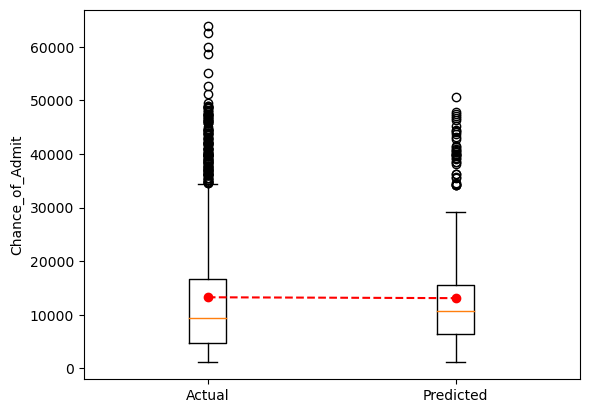

In [43]:
data = [y, y_pred_rfr]
labels = ['Actual', 'Predicted']

plt.boxplot(data, labels=labels)
plt.ylabel('Chance_of_Admit')

# Vẽ đường kết nối giữa các điểm trung bình
mean_actual = np.mean(y)
mean_predicted = np.mean(y_pred_rfr)
plt.plot([1, 2], [mean_actual, mean_predicted], color='r', linestyle='--', marker='o')

plt.show()

In [22]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [23]:
y_pred_gbr = gbr.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred_gbr))
print("R2 core: ", r2_score(y_test, y_pred_gbr))


MSE:  19460953.92039004
R2 core:  0.8579233917179111
